In [91]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('../Data Resources/Reviews.csv')

In [4]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [58]:
### add some columns for upvote metrics
data['Helpful %'] = np.where(data['HelpfulnessDenominator'] > 0, data['HelpfulnessNumerator'] / data['HelpfulnessDenominator'], -1)

In [59]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN,-1.0


In [60]:
data['%upvote'] = pd.cut( data['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [61]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN,-1.0


In [62]:
data.groupby(['Score','%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful%  \
Score %upvote                                                              
1     Empty                      8060    8060     8060    8060      8060   
      0-20%                      2338    2338     2338    2338      2338   
      20-40%                     4649    4649     4649    4649      4649   
      40-60%                     6586    6586     6586    6586      6586   
      60-80%                     5838    5838     5838    5838      5838   
      80-100%                   12531   12531    12531   12531     12531   
2     Empty                      4234    4234     4234    4234      4234   
      0-20%                       762     762      737     762       762   
      20-40%                     1618    1618     1618    1618      1618   
      40-60%                     3051    3051     3051    3051      3051   
      60-80%                     2486    2486     2486    2486      2486   
      80-100%                    7014    7014     7014    7014      7014   
3     Empty                      5062    5062     5062    5062      5062   
      0-20%                       474     474      474     474       474   
      20-40%                     1506    1506     1506    1506      1506   
      40-60%                     3384    3384     3384    3384      3384   
      60-80%                     2754    2754     2754    2754      2754   
      80-100%                   11037   11037 

In [64]:
data_s = data.groupby(['Score','%upvote']).agg({'Id':'count'}).reset_index()

In [65]:
pivote_tbl = data_s.pivot(index='%upvote',columns='Score')

In [66]:
import seaborn as sns 

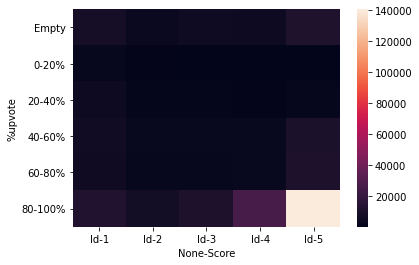

In [67]:
sns.heatmap(pivote_tbl)

In [68]:
## id five has most number of positive reviews 

In [69]:
data['Score'].unique()

array([5, 1, 4, 2, 3])

In [70]:
data2 = data[data['Score']!=3]

In [71]:
data2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN,-1.0


In [72]:
data2['Score'].unique()

array([5, 1, 4, 2])

In [84]:
X = data2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = data2['Score'].map(y_dict)

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

### this stop words will remove he she is or it like things from text

In [86]:
X_c = c.fit_transform(X)

In [87]:
X_c.shape

(525814, 114969)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)

In [89]:
from sklearn.linear_model import LogisticRegression

In [82]:
log=LogisticRegression()


In [92]:
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)


Model Accuracy: 0.9366013966862933


In [95]:
print ('Model Accuracy: {}%'.format(acc*100))

Model Accuracy: 93.66013966862933%


In [99]:
w = c.get_feature_names()

In [102]:
coef = ml.coef_.tolist()[0]

In [105]:
data3 = pd.DataFrame({'Words':w,'Coeficent':coef})

In [108]:
results = data3.sort_values(['Coeficent','Words'],ascending=False)

In [109]:
results.head(20)

,Words,Coeficent
80600,pleasantly,4.154347
94667,skeptical,3.466399
5865,addicting,3.184557
39072,downside,3.150545
87967,resist,2.630978
113138,worries,2.415286
35726,delish,2.413414
55029,hooked,2.370407
39214,drawback,2.260514
54130,hesitant,2.252366


In [112]:
results.tail(20)

,Words,Coeficent
106940,unbearable,-2.352809
91358,schar,-2.410664
76576,overpowers,-2.504276
35220,defeats,-2.601639
37563,disappointment,-2.640306
65064,lousy,-2.659151
67898,mediocre,-2.694371
23814,bummer,-2.764903
106852,unacceptable,-2.779782
37528,disapointed,-2.815204
